In [158]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 200
pd.options.display.max_rows = 999
import matplotlib.pyplot as plt  
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.dummy import DummyClassifier

In [4]:
df = pd.read_csv('data/2016-2017_Graduation_Outcomes_School.csv')

/Users/markbrennan/anaconda3/envs/learn-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6,7,9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,DBN,School Name,Demographic Category,Demographic Variable,Cohort Year,Cohort,Total Cohort #,Total Grads #,Total Grads % of cohort,Total Regents #,Total Regents % of cohort,Total Regents % of grads,Advanced Regents #,Advanced Regents % of cohort,Advanced Regents % of grads,Regents w/o Advanced #,Regents w/o Advanced % of cohort,Regents w/o Advanced % of grads,Local #,Local % of cohort,Local % of grads,Still Enrolled #,Still Enrolled % of cohort,Dropped Out #,Dropped Out % of cohort,SACC (IEP Diploma) #,SACC (IEP Diploma) % of cohort,TASC (GED) #,TASC (GED) % of cohort
0,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,"2,013",4 year August,36,25,69.4,23,63.9,92.0,0,0.0,0.0,23.0,63.9,92.0,2.0,5.6,8.0,3.0,8.3,7.0,19.4,NaN,NaN,NaN,NaN
1,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,"2,012",4 year August,44,24,54.5,20,45.5,83.3,1,2.3,4.2,19.0,43.2,79.2,4.0,9.1,16.7,10.0,22.7,10.0,22.7,NaN,NaN,NaN,NaN
2,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,"2,011",4 year August,73,46,63.0,41,56.2,89.1,0,0.0,0.0,41.0,56.2,89.1,5.0,6.8,10.9,18.0,24.7,7.0,9.6,NaN,NaN,NaN,NaN
3,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,"2,010",4 year August,61,26,42.6,26,42.6,100.0,1,1.6,3.8,25.0,41.0,96.2,0.0,0.0,0.0,18.0,29.5,17.0,27.9,NaN,NaN,NaN,NaN
4,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,"2,009",4 year August,85,49,57.6,44,51.8,89.8,0,0.0,0.0,44.0,51.8,89.8,5.0,5.9,10.2,28.0,32.9,8.0,9.4,NaN,NaN,NaN,NaN


In [6]:
len(df.columns)

29

In [28]:
# # get 2014 graduation (2010 cohort)
# df_2014 = df[df['Cohort Year'] == '2,010'][df.Cohort=='4 year June'][df['Demographic Category']=='All Students']

# # create a new column (will become the index) combining DBN ID + grad year
# df_2014['ID'] = df_2014.DBN + '_' + '2014'

/Users/markbrennan/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [235]:
# get 2015 graduation (2011 cohort)
df_2015 = df[df['Cohort Year'] == '2,011'][df.Cohort=='4 year June'][df['Demographic Category']=='All Students']

# create a new column (will become the index) combining DBN ID + grad year
df_2015['ID'] = df_2015.DBN + '_' + '2015'

/Users/markbrennan/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [236]:
# get 2016 graduation (2012 cohort)
df_2016 = df[df['Cohort Year'] == '2,012'][df.Cohort=='4 year June'][df['Demographic Category']=='All Students']

# create a new column (will become the index) combining DBN ID + grad year
df_2016['ID'] = df_2016.DBN + '_' + '2016'

/Users/markbrennan/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [237]:
# get 2017 graduation (2012 cohort)
df_2017 = df[df['Cohort Year'] == '2,013'][df.Cohort=='4 year June'][df['Demographic Category']=='All Students']

# create a new column (will become the index) combining DBN ID + grad year
df_2017['ID'] = df_2017.DBN + '_' + '2017'

/Users/markbrennan/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [238]:
len(df_2017)

477

In [239]:
len(df_2015)

467

In [240]:
len(df_2016)

474

In [241]:
df_2015_target = df_2015[['ID', 'School Name', 'Total Grads % of cohort']]

In [242]:
df_2016_target = df_2016[['ID', 'School Name', 'Total Grads % of cohort']]

In [243]:
df_2017_target = df_2017[['ID', 'School Name', 'Total Grads % of cohort']]

In [53]:
# df_2015_target.set_index('ID', inplace=True)

In [54]:
# df_2016_target.set_index('ID', inplace=True)

In [55]:
# df_2017_target.set_index('ID', inplace=True)

In [244]:
df_hs_target = pd.concat([df_2015_target, df_2016_target, df_2017_target])

In [245]:
len(df_hs_target)

1418

In [177]:
df_hs_target.head()

,ID,School Name,Total Grads % of cohort
11,01M292_2015,ORCHARD COLLEGIATE ACADEMY,63.0
58,01M448_2015,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,82.9
110,01M450_2015,EAST SIDE COMMUNITY SCHOOL,85.2
160,01M458_2015,FORSYTH SATELLITE ACADEMY,14.9
197,01M509_2015,MARTA VALLE HIGH SCHOOL,44.1


In [178]:
len(df_hs_target)

1418

In [437]:
df_hs_target.to_csv('data/df_hs_target.csv')

In [248]:
df_qual_2014_15 = pd.read_csv('data/2014_2015_HS_SQR_Results_2016_01_07.csv')
df_qual_2014_15['ID'] = df_qual_2014_15['DBN'] + '_' + '2015'

In [249]:
df_qual_2015_16 = pd.read_csv('data/2015_-_2016_School_Quality_Report_Results_for_High_School.csv')
df_qual_2015_16['ID'] = df_qual_2015_16['DBN'] + '_' + '2016'

In [250]:
df_qual_2016_17 = pd.read_csv('data/2016_-_2017_School_Quality_Report_Results_for_High_Schools.csv')
df_qual_2016_17['ID'] = df_qual_2016_17['DBN'] + '_' + '2017'

In [86]:
cols_15 = ['DBN',
'School Name',
'School Type',
'Enrollment',
'Rigorous Instruction Rating',
'Collaborative Teachers Rating',
'Supportive Environment Rating',
'Effective School Leadership Rating',
'Strong Family-Community Ties Rating',
'Trust Rating',
'Student Achievement Rating',
'Rigorous Instruction - Percent Positive',
'Collaborative Teachers - Percent Positive',
'Supportive Environment - Percent Positive',
'Effective School Leadership - Percent Positive',
'Strong Family-Community Ties - Percent Positive',
'Trust - Percent Positive',
'Quality Review - How interesting and challenging is the curriculum?',
'Quality Review - How effective is the teaching and learning?',
'Quality Review - How well does the school assess what students are learning?',
'Quality Review - How well do teachers work with each other?',
'Quality Review - How clearly are high expectations communicated to students and staff?',
'Quality Review - Dates of Review',
'Average Grade 8 English Proficiency',
'Average Grade 8 Math Proficiency',
'Percent English Language Learners',
'Percent Students with Disabilities',
'Percent Self-Contained',
'Economic Need Index',
'Percent in Temp Housing - 4yr',
'Percent HRA Eligible',
'Percent Asian',
'Percent Black',
'Percent Hispanic',
'Percent White',
'Years of principal experience at this school',
'Percent of teachers with 3 or more years of experience',
'Student Attendance Rate',
'Percent of Students Chronically Absent',
'Teacher Attendance Rate']

In [88]:
cols_16 = ['DBN',
'School Name',
'School Type',
'Enrollment',
'Rigorous Instruction Rating',
'Collaborative Teachers Rating',
'Supportive Environment Rating',
'Effective School Leadership Rating',
'Strong Family-Community Ties Rating',
'Trust Rating',
'Student Achievement Rating',
'Rigorous Instruction - Percent Positive',
'Collaborative Teachers - Percent Positive',
'Supportive Environment - Percent Positive',
'Effective School Leadership - Percent Positive',
'Strong Family-Community Ties - Percent Positive',
'Trust - Percent Positive',
'Quality Review - How interesting and challenging is the curriculum?',
'Quality Review - How effective is the teaching and learning?',
'Quality Review - How well does the school assess what students are learning?',
'Quality Review - How clearly are high expectations communicated to students and staff?',
'Quality Review - How well do teachers work with each other?',
'Quality Review - Dates of Review',
'Average Grade 8 English Proficiency',
'Average Grade 8 Math Proficiency',
'Percent English Language Learners',
'Percent Students with Disabilities',
'Percent Self-Contained',
'Economic Need Index',
'Percent Overage/Undercredited',
'Percent in Temp Housing',
'Percent HRA Eligible',
'Percent Asian',
'Percent Black',
'Percent Hispanic',
'Percent White',
'Years of principal experience at this school',
'Percent of teachers with 3 or more years of experience',
'Student Attendance Rate',
'Percent of Students Chronically Absent',
'Teacher Attendance Rate']

In [90]:
cols_17 = ['DBN',
'School Name',
'School Type',
'Enrollment',
'Rigorous Instruction Rating',
'Collaborative Teachers Rating',
'Supportive Environment Rating',
'Effective School Leadership Rating',
'Strong Family-Community Ties Rating',
'Trust Rating',
'Student Achievement Rating',
'Rigorous Instruction - Percent Positive',
'Collaborative Teachers - Percent Positive',
'Supportive Environment - Percent Positive',
'Effective School Leadership - Percent Positive',
'Strong Family-Community Ties - Percent Positive',
'Trust - Percent Positive',
'Quality Review - How interesting and challenging is the curriculum?',
'Quality Review - How effective is the teaching and learning?',
'Quality Review - How well does the school assess what students are learning?',
'Quality Review - How clearly are high expectations communicated to students and staff?',
'Quality Review - How well do teachers work with each other?',
'Quality Review - How safe and inclusive is the school while supporting social-emotional growth?',
'Quality Review - How well does the school allocate and manage resources?',
'Quality Review - How well does the school identify, track, and meet its goals?',
'Quality Review - How thoughtful is the school‚Äôs approach to teacher development and evaluation?',
'Quality Review - How well are school decisions evaluated and adjusted?',
'Quality Review - Dates of Review',
'Average Grade 8 English Proficiency',
'Average Grade 8 Math Proficiency',
'Percent English Language Learners',
'Percent Students with Disabilities',
'Percent Self-Contained',
'Economic Need Index',
'Percent Overage/ Undercredited',
'Percent in Temp Housing',
'Percent HRA Eligible',
'Percent Asian',
'Percent Black',
'Percent Hispanic',
'Percent White',
'Years of principal experience at this school',
'Percent of teachers with 3 or more years of experience',
'Student Attendance Rate']

In [91]:
len(cols_15)

40

In [92]:
len(cols_16)

41

In [93]:
len(cols_17)

44

In [106]:
missing_cols = []
for i in range(len(cols_17)):
    if cols_17[i] not in cols_15 or cols_17[i] not in cols_16:
        missing_cols.append(cols_17[i])

for i in range(len(cols_16)):
    if cols_16[i] not in cols_15 or cols_16[i] not in cols_17:
        missing_cols.append(cols_16[i])
        

In [107]:
missing_cols

['Quality Review - How safe and inclusive is the school while supporting social-emotional growth?',
 'Quality Review - How well does the school allocate and manage resources?',
 'Quality Review - How well does the school identify, track, and meet its goals?',
 'Quality Review - How thoughtful is the school‚Äôs approach to teacher development and evaluation?',
 'Quality Review - How well are school decisions evaluated and adjusted?',
 'Percent Overage/ Undercredited',
 'Percent in Temp Housing',
 'Percent Overage/Undercredited',
 'Percent in Temp Housing',
 'Percent of Students Chronically Absent',
 'Teacher Attendance Rate']

In [108]:
len(missing_cols)

11

In [109]:
# df_qual_2014_15.set_index('ID', inplace=True)

In [110]:
# df_qual_2015_16.set_index('ID', inplace=True)

In [111]:
# df_qual_2016_17.set_index('ID', inplace=True)

In [251]:
df_qual = pd.concat([df_qual_2014_15, df_qual_2015_16, df_qual_2016_17], sort=True)

In [252]:
len(df_qual)

1470

In [188]:
df_qual.head()

,Average Grade 8 English Proficiency,Average Grade 8 Math Proficiency,Collaborative Teachers - Percent Positive,Collaborative Teachers Rating,DBN,Economic Need Index,Effective School Leadership - Percent Positive,Effective School Leadership Rating,Enrollment,ID,Percent Asian,Percent Black,Percent English Language Learners,Percent HRA Eligible,Percent Hispanic,Percent Overage/ Undercredited,Percent Overage/Undercredited,Percent Self-Contained,Percent Students with Disabilities,Percent White,Percent in Temp Housing,Percent in Temp Housing - 4yr,Percent of Students Chronically Absent,Percent of teachers with 3 or more years of experience,Quality Review - Dates of Review,Quality Review - How clearly are high expectations communicated to students and staff?,Quality Review - How effective is the teaching and learning?,Quality Review - How interesting and challenging is the curriculum?,Quality Review - How safe and inclusive is the school while supporting social-emotional growth?,Quality Review - How thoughtful is the school’s approach to teacher development and evaluation?,Quality Review - How well are school decisions evaluated and adjusted?,Quality Review - How well do teachers work with each other?,Quality Review - How well does the school allocate and manage resources?,Quality Review - How well does the school assess what students are learning?,"Quality Review - How well does the school identify, track, and meet its goals?",Rigorous Instruction - Percent Positive,Rigorous Instruction Rating,School Name,School Type,Strong Family-Community Ties - Percent Positive,Strong Family-Community Ties Rating,Student Achievement Rating,Student Attendance Rate,Supportive Environment - Percent Positive,Supportive Environment Rating,Teacher Attendance Rate,Trust - Percent Positive,Trust Rating,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Years of principal experience at this school
0,2.18,2.06,77%,Approaching Target,01M292,83.2%,72%,Approaching Target,255,01M292_2015,13.2%,24.4%,12.7%,66.3%,56.6%,NaN,NaN,1.5%,29.8%,3.9%,NaN,19.0%,56.8%,66.7%,"May 1, 2015",Developing,Developing,Developing,NaN,NaN,NaN,Developing,NaN,Developing,NaN,72%,Not Meeting Target,Henry Street School for International Studies,High School,76%,Approaching Target,Meeting Target,76.6%,77%,Approaching Target,97.1%,87%,Meeting Target,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,2.27,2.37,95%,Meeting Target,01M448,81.2%,93%,Exceeding Target,304,01M448_2015,29.9%,25.0%,19.4%,59.9%,41.1%,NaN,NaN,0.3%,22.0%,3.3%,NaN,26.3%,34.7%,69.6%,"April 21, 2015",Proficient,Proficient,Well Developed,NaN,NaN,NaN,Well Developed,NaN,Proficient,NaN,85%,Meeting Target,University Neighborhood High School,High School,79%,Meeting Target,Exceeding Target,88.0%,87%,Exceeding Target,97.1%,95%,Exceeding Target,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.5
2,2.66,2.63,95%,Exceeding Target,01M450,61.0%,96%,Exceeding Target,666,01M450_2015,9.4%,22.1%,1.8%,44.7%,57.9%,NaN,NaN,0.0%,23.4%,8.3%,NaN,5.7%,16.5%,78.4%,"May 26, 2015",Well Developed,Proficient,Well Developed,NaN,NaN,NaN,Well Developed,NaN,Well Developed,NaN,92%,Exceeding Target,East Side Community School,High School,88%,Exceeding Target,Exceeding Target,93.8%,92%,Exceeding Target,96.1%,95%,Exceeding Target,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.8
3,2.28,2.09,76%,Approaching Target,01M509,76.7%,69%,Approaching Target,363,01M509_2015,5.8%,39.9%,9.1%,59.5%,51.2%,NaN,NaN,14.6%,28.4%,2.5%,NaN,14.9%,64.7%,69.0%,"January 8, 2015",Proficient,Developing,Developing,NaN,NaN,NaN,Developing,NaN,Developing,NaN,86%,Approaching Target,Marta Valle High School,High School,70%,Approaching Target,Approaching Target,76.8%,81%,Approaching Target,97.1%,82%,Approaching Target,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.9
4,3.50,3.53,73%,Approaching Target,01M539,25.7%,55%,Not Meeting Target,1735,01M539_2015,38.5%,13.3%,0.2%,26.0%,18.0%,NaN,NaN,0.0%,4.3%,28.6%,NaN,2.9%,13.0%,60.2%,"February 5, 2015",Proficient,Well Developed,Well Developed,NaN,NaN,NaN,Well D

In [189]:
df_qual['Percent of Students Chronically Absent'].count()

1461

In [190]:
df_qual['Percent in Temp Housing'].count()

978

In [192]:
len(df_qual.columns)

57

In [128]:
df_qual['Unnamed: 41']

ID
01M292_2015   NaN
01M448_2015   NaN
01M450_2015   NaN
01M509_2015   NaN
01M539_2015   NaN
               ..
84X539_2017   NaN
84X553_2017   NaN
84X581_2017   NaN
84X703_2017   NaN
84X704_2017   NaN
Name: Unnamed: 41, Length: 1470, dtype: float64

In [131]:
df_qual[['Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47']]

,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
ID,,,,,,,,
01M292_2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01M448_2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01M450_2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01M509_2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01M539_2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
84X539_2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84X553_2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84X581_2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
['Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47']]

In [253]:
df_qual.drop(labels=['Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47'], axis=1,inplace=True)

In [254]:
len(df_qual.columns)

49

In [255]:
df_qual.head()

,Average Grade 8 English Proficiency,Average Grade 8 Math Proficiency,Collaborative Teachers - Percent Positive,Collaborative Teachers Rating,DBN,Economic Need Index,Effective School Leadership - Percent Positive,Effective School Leadership Rating,Enrollment,ID,Percent Asian,Percent Black,Percent English Language Learners,Percent HRA Eligible,Percent Hispanic,Percent Overage/ Undercredited,Percent Overage/Undercredited,Percent Self-Contained,Percent Students with Disabilities,Percent White,Percent in Temp Housing,Percent in Temp Housing - 4yr,Percent of Students Chronically Absent,Percent of teachers with 3 or more years of experience,Quality Review - Dates of Review,Quality Review - How clearly are high expectations communicated to students and staff?,Quality Review - How effective is the teaching and learning?,Quality Review - How interesting and challenging is the curriculum?,Quality Review - How safe and inclusive is the school while supporting social-emotional growth?,Quality Review - How thoughtful is the school’s approach to teacher development and evaluation?,Quality Review - How well are school decisions evaluated and adjusted?,Quality Review - How well do teachers work with each other?,Quality Review - How well does the school allocate and manage resources?,Quality Review - How well does the school assess what students are learning?,"Quality Review - How well does the school identify, track, and meet its goals?",Rigorous Instruction - Percent Positive,Rigorous Instruction Rating,School Name,School Type,Strong Family-Community Ties - Percent Positive,Strong Family-Community Ties Rating,Student Achievement Rating,Student Attendance Rate,Supportive Environment - Percent Positive,Supportive Environment Rating,Teacher Attendance Rate,Trust - Percent Positive,Trust Rating,Years of principal experience at this school
0,2.18,2.06,77%,Approaching Target,01M292,83.2%,72%,Approaching Target,255,01M292_2015,13.2%,24.4%,12.7%,66.3%,56.6%,NaN,NaN,1.5%,29.8%,3.9%,NaN,19.0%,56.8%,66.7%,"May 1, 2015",Developing,Developing,Developing,NaN,NaN,NaN,Developing,NaN,Developing,NaN,72%,Not Meeting Target,Henry Street School for International Studies,High School,76%,Approaching Target,Meeting Target,76.6%,77%,Approaching Target,97.1%,87%,Meeting Target,3.0
1,2.27,2.37,95%,Meeting Target,01M448,81.2%,93%,Exceeding Target,304,01M448_2015,29.9%,25.0%,19.4%,59.9%,41.1%,NaN,NaN,0.3%,22.0%,3.3%,NaN,26.3%,34.7%,69.6%,"April 21, 2015",Proficient,Proficient,Well Developed,NaN,NaN,NaN,Well Developed,NaN,Proficient,NaN,85%,Meeting Target,University Neighborhood High School,High School,79%,Meeting Target,Exceeding Target,88.0%,87%,Exceeding Target,97.1%,95%,Exceeding Target,5.5
2,2.66,2.63,95%,Exceeding Target,01M450,61.0%,96%,Exceeding Target,666,01M450_2015,9.4%,22.1%,1.8%,44.7%,57.9%,NaN,NaN,0.0%,23.4%,8.3%,NaN,5.7%,16.5%,78.4%,"May 26, 2015",Well Developed,Proficient,Well Developed,NaN,NaN,NaN,Well Developed,NaN,Well Developed,NaN,92%,Exceeding Target,East Side Community School,High School,88%,Exceeding Target,Exceeding Target,93.8%,92%,Exceeding Target,96.1%,95%,Exceeding Target,13.8
3,2.28,2.09,76%,Approaching Target,01M509,76.7%,69%,Approaching Target,363,01M509_2015,5.8%,39.9%,9.1%,59.5%,51.2%,NaN,NaN,14.6%,28.4%,2.5%,NaN,14.9%,64.7%,69.0%,"January 8, 2015",Proficient,Developing,Developing,NaN,NaN,NaN,Developing,NaN,Developing,NaN,86%,Approaching Target,Marta Valle High School,High School,70%,Approaching Target,Approaching Target,76.8%,81%,Approaching Target,97.1%,82%,Approaching Target,1.9
4,3.50,3.53,73%,Approaching Target,01M539,25.7%,55%,Not Meeting Target,1735,01M539_2015,38.5%,13.3%,0.2%,26.0%,18.0%,NaN,NaN,0.0%,4.3%,28.6%,NaN,2.9%,13.0%,60.2%,"February 5, 2015",Proficient,Well Developed,Well Developed,NaN,NaN,NaN,Well Developed,NaN,Well Developed,NaN,81%,Exceeding Target,"New Explorations into Science, Technology and ...",High School,81%,Approaching Target,Exceeding Target,95.2%,85%,Meeting Target,96.7%,74%,Not Meeting Target,9.0


In [136]:
df_hs_target.head()

,School Name,Total Grads % of cohort
ID,,
01M292_2015,ORCHARD COLLEGIATE ACADEMY,63.0
01M448_2015,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,82.9
01M450_2015,EAST SIDE COMMUNITY SCHOOL,85.2
01M458_2015,FORSYTH SATELLITE ACADEMY,14.9
01M509_2015,MARTA VALLE HIGH SCHOOL,44.1


In [288]:
df_qual.head()

,Average Grade 8 English Proficiency,Average Grade 8 Math Proficiency,Collaborative Teachers - Percent Positive,Collaborative Teachers Rating,DBN,Economic Need Index,Effective School Leadership - Percent Positive,Effective School Leadership Rating,Enrollment,ID,Percent Asian,Percent Black,Percent English Language Learners,Percent HRA Eligible,Percent Hispanic,Percent Overage/ Undercredited,Percent Overage/Undercredited,Percent Self-Contained,Percent Students with Disabilities,Percent White,Percent in Temp Housing,Percent in Temp Housing - 4yr,Percent of Students Chronically Absent,Percent of teachers with 3 or more years of experience,Quality Review - Dates of Review,Quality Review - How clearly are high expectations communicated to students and staff?,Quality Review - How effective is the teaching and learning?,Quality Review - How interesting and challenging is the curriculum?,Quality Review - How safe and inclusive is the school while supporting social-emotional growth?,Quality Review - How thoughtful is the school’s approach to teacher development and evaluation?,Quality Review - How well are school decisions evaluated and adjusted?,Quality Review - How well do teachers work with each other?,Quality Review - How well does the school allocate and manage resources?,Quality Review - How well does the school assess what students are learning?,"Quality Review - How well does the school identify, track, and meet its goals?",Rigorous Instruction - Percent Positive,Rigorous Instruction Rating,School Name,School Type,Strong Family-Community Ties - Percent Positive,Strong Family-Community Ties Rating,Student Achievement Rating,Student Attendance Rate,Supportive Environment - Percent Positive,Supportive Environment Rating,Teacher Attendance Rate,Trust - Percent Positive,Trust Rating,Years of principal experience at this school
0,2.18,2.06,77%,Approaching Target,01M292,83.2%,72%,Approaching Target,255,01M292_2015,13.2%,24.4%,12.7%,66.3%,56.6%,NaN,NaN,1.5%,29.8%,3.9%,NaN,19.0%,56.8%,66.7%,"May 1, 2015",Developing,Developing,Developing,NaN,NaN,NaN,Developing,NaN,Developing,NaN,72%,Not Meeting Target,Henry Street School for International Studies,High School,76%,Approaching Target,Meeting Target,76.6%,77%,Approaching Target,97.1%,87%,Meeting Target,3.0
1,2.27,2.37,95%,Meeting Target,01M448,81.2%,93%,Exceeding Target,304,01M448_2015,29.9%,25.0%,19.4%,59.9%,41.1%,NaN,NaN,0.3%,22.0%,3.3%,NaN,26.3%,34.7%,69.6%,"April 21, 2015",Proficient,Proficient,Well Developed,NaN,NaN,NaN,Well Developed,NaN,Proficient,NaN,85%,Meeting Target,University Neighborhood High School,High School,79%,Meeting Target,Exceeding Target,88.0%,87%,Exceeding Target,97.1%,95%,Exceeding Target,5.5
2,2.66,2.63,95%,Exceeding Target,01M450,61.0%,96%,Exceeding Target,666,01M450_2015,9.4%,22.1%,1.8%,44.7%,57.9%,NaN,NaN,0.0%,23.4%,8.3%,NaN,5.7%,16.5%,78.4%,"May 26, 2015",Well Developed,Proficient,Well Developed,NaN,NaN,NaN,Well Developed,NaN,Well Developed,NaN,92%,Exceeding Target,East Side Community School,High School,88%,Exceeding Target,Exceeding Target,93.8%,92%,Exceeding Target,96.1%,95%,Exceeding Target,13.8
3,2.28,2.09,76%,Approaching Target,01M509,76.7%,69%,Approaching Target,363,01M509_2015,5.8%,39.9%,9.1%,59.5%,51.2%,NaN,NaN,14.6%,28.4%,2.5%,NaN,14.9%,64.7%,69.0%,"January 8, 2015",Proficient,Developing,Developing,NaN,NaN,NaN,Developing,NaN,Developing,NaN,86%,Approaching Target,Marta Valle High School,High School,70%,Approaching Target,Approaching Target,76.8%,81%,Approaching Target,97.1%,82%,Approaching Target,1.9
4,3.50,3.53,73%,Approaching Target,01M539,25.7%,55%,Not Meeting Target,1735,01M539_2015,38.5%,13.3%,0.2%,26.0%,18.0%,NaN,NaN,0.0%,4.3%,28.6%,NaN,2.9%,13.0%,60.2%,"February 5, 2015",Proficient,Well Developed,Well Developed,NaN,NaN,NaN,Well Developed,NaN,Well Developed,NaN,81%,Exceeding Target,"New Explorations into Science, Technology and ...",High School,81%,Approaching Target,Exceeding Target,95.2%,85%,Meeting Target,96.7%,74%,Not Meeting Target,9.0


In [289]:
len(df_qual)

1470

In [257]:
target_ids = df_hs_target['ID']

In [258]:
len(target_ids)

1418

In [259]:
qual_ids = df_qual['ID']

In [260]:
len(qual_ids)

1470

In [284]:
missing_ids = []
qual_id_list = qual_ids.to_list()
target_id_list = target_ids.to_list()

In [285]:
for i in range(len(qual_id_list)):
    if qual_id_list[i] not in target_id_list:
        missing_ids.append(qual_id_list[i])

In [286]:
len(missing_ids)

216

In [204]:
missing_ids

['02M135_2015',
 '02M139_2015',
 '02M280_2015',
 '02M282_2015',
 '02M546_2015',
 '03M859_2015',
 '05M157_2015',
 '06M211_2015',
 '07X223_2015',
 '07X259_2015',
 '08X320_2015',
 '08X348_2015',
 '08X349_2015',
 '08X558_2015',
 '09X564_2015',
 '10X264_2015',
 '10X353_2015',
 '16K765_2015',
 '19K764_2015',
 '22K611_2015',
 '24Q236_2015',
 '25Q240_2015',
 '25Q241_2015',
 '26Q315_2015',
 '27Q314_2015',
 '27Q334_2015',
 '28Q157_2015',
 '28Q167_2015',
 '29Q243_2015',
 '29Q313_2015',
 '29Q327_2015',
 '30Q258_2015',
 '84K355_2015',
 '84K356_2015',
 '84K357_2015',
 '84K358_2015',
 '84K359_2015',
 '84K473_2015',
 '84K508_2015',
 '84K538_2015',
 '84K593_2015',
 '84K608_2015',
 '84K648_2015',
 '84K693_2015',
 '84K707_2015',
 '84K710_2015',
 '84K730_2015',
 '84K733_2015',
 '84K738_2015',
 '84K739_2015',
 '84K744_2015',
 '84K777_2015',
 '84K780_2015',
 '84M279_2015',
 '84M284_2015',
 '84M335_2015',
 '84M336_2015',
 '84M341_2015',
 '84M350_2015',
 '84M353_2015',
 '84M433_2015',
 '84M481_2015',
 '84M709

In [205]:
df_qual[df_qual.ID =='08X558_2015']

,Average Grade 8 English Proficiency,Average Grade 8 Math Proficiency,Collaborative Teachers - Percent Positive,Collaborative Teachers Rating,DBN,Economic Need Index,Effective School Leadership - Percent Positive,Effective School Leadership Rating,Enrollment,ID,Percent Asian,Percent Black,Percent English Language Learners,Percent HRA Eligible,Percent Hispanic,Percent Overage/ Undercredited,Percent Overage/Undercredited,Percent Self-Contained,Percent Students with Disabilities,Percent White,Percent in Temp Housing,Percent in Temp Housing - 4yr,Percent of Students Chronically Absent,Percent of teachers with 3 or more years of experience,Quality Review - Dates of Review,Quality Review - How clearly are high expectations communicated to students and staff?,Quality Review - How effective is the teaching and learning?,Quality Review - How interesting and challenging is the curriculum?,Quality Review - How safe and inclusive is the school while supporting social-emotional growth?,Quality Review - How thoughtful is the school’s approach to teacher development and evaluation?,Quality Review - How well are school decisions evaluated and adjusted?,Quality Review - How well do teachers work with each other?,Quality Review - How well does the school allocate and manage resources?,Quality Review - How well does the school assess what students are learning?,"Quality Review - How well does the school identify, track, and meet its goals?",Rigorous Instruction - Percent Positive,Rigorous Instruction Rating,School Name,School Type,Strong Family-Community Ties - Percent Positive,Strong Family-Community Ties Rating,Student Achievement Rating,Student Attendance Rate,Supportive Environment - Percent Positive,Supportive Environment Rating,Teacher Attendance Rate,Trust - Percent Positive,Trust Rating,Years of principal experience at this school
142,2.37,2.19,93%,NaN,08X558,70.1%,94%,NaN,396,08X558_2015,4.5%,26.8%,6.8%,55.3%,56.6%,NaN,NaN,1.3%,22.5%,8.8%,NaN,9.3%,42.3%,32.3%,"December 10, 2014",Proficient,Proficient,Proficient,NaN,NaN,NaN,Proficient,NaN,Well Developed,NaN,87%,NaN,Westchester Square Academy,High School,78%,NaN,NaN,86.5%,84%,NaN,97.3%,93%,NaN,3.0


In [207]:
df_hs_target[df_hs_target.ID =='08X558_2015']

,ID,School Name,Total Grads % of cohort


In [220]:
df_qual[df_qual.ID=='05M157_2015'].index

Int64Index([88], dtype='int64')

In [221]:
df_qual.drop(df_qual.loc[df_qual['ID']=='05M157_2015'].index, inplace=True)

In [287]:
len(df_qual)

1470

In [228]:
# for i in missing_ids:
#     df_qual.drop(df_qual.loc[df_qual['ID']==i].index, inplace=True)

In [283]:
df_qual.head()

,Average Grade 8 English Proficiency,Average Grade 8 Math Proficiency,Collaborative Teachers - Percent Positive,Collaborative Teachers Rating,DBN,Economic Need Index,Effective School Leadership - Percent Positive,Effective School Leadership Rating,Enrollment,ID,Percent Asian,Percent Black,Percent English Language Learners,Percent HRA Eligible,Percent Hispanic,Percent Overage/ Undercredited,Percent Overage/Undercredited,Percent Self-Contained,Percent Students with Disabilities,Percent White,Percent in Temp Housing,Percent in Temp Housing - 4yr,Percent of Students Chronically Absent,Percent of teachers with 3 or more years of experience,Quality Review - Dates of Review,Quality Review - How clearly are high expectations communicated to students and staff?,Quality Review - How effective is the teaching and learning?,Quality Review - How interesting and challenging is the curriculum?,Quality Review - How safe and inclusive is the school while supporting social-emotional growth?,Quality Review - How thoughtful is the school’s approach to teacher development and evaluation?,Quality Review - How well are school decisions evaluated and adjusted?,Quality Review - How well do teachers work with each other?,Quality Review - How well does the school allocate and manage resources?,Quality Review - How well does the school assess what students are learning?,"Quality Review - How well does the school identify, track, and meet its goals?",Rigorous Instruction - Percent Positive,Rigorous Instruction Rating,School Name,School Type,Strong Family-Community Ties - Percent Positive,Strong Family-Community Ties Rating,Student Achievement Rating,Student Attendance Rate,Supportive Environment - Percent Positive,Supportive Environment Rating,Teacher Attendance Rate,Trust - Percent Positive,Trust Rating,Years of principal experience at this school
0,2.18,2.06,77%,Approaching Target,01M292,83.2%,72%,Approaching Target,255,01M292_2015,13.2%,24.4%,12.7%,66.3%,56.6%,NaN,NaN,1.5%,29.8%,3.9%,NaN,19.0%,56.8%,66.7%,"May 1, 2015",Developing,Developing,Developing,NaN,NaN,NaN,Developing,NaN,Developing,NaN,72%,Not Meeting Target,Henry Street School for International Studies,High School,76%,Approaching Target,Meeting Target,76.6%,77%,Approaching Target,97.1%,87%,Meeting Target,3.0
1,2.27,2.37,95%,Meeting Target,01M448,81.2%,93%,Exceeding Target,304,01M448_2015,29.9%,25.0%,19.4%,59.9%,41.1%,NaN,NaN,0.3%,22.0%,3.3%,NaN,26.3%,34.7%,69.6%,"April 21, 2015",Proficient,Proficient,Well Developed,NaN,NaN,NaN,Well Developed,NaN,Proficient,NaN,85%,Meeting Target,University Neighborhood High School,High School,79%,Meeting Target,Exceeding Target,88.0%,87%,Exceeding Target,97.1%,95%,Exceeding Target,5.5
2,2.66,2.63,95%,Exceeding Target,01M450,61.0%,96%,Exceeding Target,666,01M450_2015,9.4%,22.1%,1.8%,44.7%,57.9%,NaN,NaN,0.0%,23.4%,8.3%,NaN,5.7%,16.5%,78.4%,"May 26, 2015",Well Developed,Proficient,Well Developed,NaN,NaN,NaN,Well Developed,NaN,Well Developed,NaN,92%,Exceeding Target,East Side Community School,High School,88%,Exceeding Target,Exceeding Target,93.8%,92%,Exceeding Target,96.1%,95%,Exceeding Target,13.8
3,2.28,2.09,76%,Approaching Target,01M509,76.7%,69%,Approaching Target,363,01M509_2015,5.8%,39.9%,9.1%,59.5%,51.2%,NaN,NaN,14.6%,28.4%,2.5%,NaN,14.9%,64.7%,69.0%,"January 8, 2015",Proficient,Developing,Developing,NaN,NaN,NaN,Developing,NaN,Developing,NaN,86%,Approaching Target,Marta Valle High School,High School,70%,Approaching Target,Approaching Target,76.8%,81%,Approaching Target,97.1%,82%,Approaching Target,1.9
4,3.50,3.53,73%,Approaching Target,01M539,25.7%,55%,Not Meeting Target,1735,01M539_2015,38.5%,13.3%,0.2%,26.0%,18.0%,NaN,NaN,0.0%,4.3%,28.6%,NaN,2.9%,13.0%,60.2%,"February 5, 2015",Proficient,Well Developed,Well Developed,NaN,NaN,NaN,Well Developed,NaN,Well Developed,NaN,81%,Exceeding Target,"New Explorations into Science, Technology and ...",High School,81%,Approaching Target,Exceeding Target,95.2%,85%,Meeting Target,96.7%,74%,Not Meeting Target,9.0


In [231]:
df_hs_target.head()

,ID,School Name,Total Grads % of cohort
11,01M292_2015,ORCHARD COLLEGIATE ACADEMY,63.0
58,01M448_2015,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,82.9
110,01M450_2015,EAST SIDE COMMUNITY SCHOOL,85.2
160,01M458_2015,FORSYTH SATELLITE ACADEMY,14.9
197,01M509_2015,MARTA VALLE HIGH SCHOOL,44.1


In [232]:
len(df_hs_target)

1418

In [233]:
len(df_qual)

1131

In [277]:
df_merged = pd.concat([df_qual, df_hs_target],axis=1, join='inner', keys=['ID'])

In [290]:
df_merged = pd.merge(left=df_hs_target, right=df_qual, how='inner', on='ID' )

In [281]:
df_merged.columns.values


array([('ID', 'Average Grade 8 English Proficiency'),
       ('ID', 'Average Grade 8 Math Proficiency'),
       ('ID', 'Collaborative Teachers - Percent Positive'),
       ('ID', 'Collaborative Teachers Rating'), ('ID', 'DBN'),
       ('ID', 'Economic Need Index'),
       ('ID', 'Effective School Leadership - Percent Positive'),
       ('ID', 'Effective School Leadership Rating'), ('ID', 'Enrollment'),
       ('ID', 'ID'), ('ID', 'Percent Asian'), ('ID', 'Percent Black'),
       ('ID', 'Percent English Language Learners'),
       ('ID', 'Percent HRA Eligible'), ('ID', 'Percent Hispanic'),
       ('ID', 'Percent Overage/ Undercredited'),
       ('ID', 'Percent Overage/Undercredited'),
       ('ID', 'Percent Self-Contained'),
       ('ID', 'Percent Students with Disabilities'),
       ('ID', 'Percent White'), ('ID', 'Percent in Temp Housing'),
       ('ID', 'Percent in Temp Housing - 4yr'),
       ('ID', 'Percent of Students Chronically Absent'),
       ('ID', 'Percent of teachers with 3

In [291]:
len(df_merged)

1254

In [327]:
df_merged.head(50)

,ID,School Name_x,Total Grads % of cohort,Average Grade 8 English Proficiency,Average Grade 8 Math Proficiency,Collaborative Teachers - Percent Positive,Collaborative Teachers Rating,DBN,Economic Need Index,Effective School Leadership - Percent Positive,Effective School Leadership Rating,Enrollment,Percent Asian,Percent Black,Percent English Language Learners,Percent HRA Eligible,Percent Hispanic,Percent Self-Contained,Percent Students with Disabilities,Percent White,Percent in Temp Housing,Percent in Temp Housing - 4yr,Percent of Students Chronically Absent,Percent of teachers with 3 or more years of experience,Quality Review - Dates of Review,Quality Review - How clearly are high expectations communicated to students and staff?,Quality Review - How effective is the teaching and learning?,Quality Review - How interesting and challenging is the curriculum?,Quality Review - How well do teachers work with each other?,Quality Review - How well does the school assess what students are learning?,Rigorous Instruction - Percent Positive,Rigorous Instruction Rating,Strong Family-Community Ties - Percent Positive,Strong Family-Community Ties Rating,Student Achievement Rating,Student Attendance Rate,Supportive Environment - Percent Positive,Supportive Environment Rating,Teacher Attendance Rate,Trust - Percent Positive,Trust Rating,Years of principal experience at this school
0,01M292_2015,ORCHARD COLLEGIATE ACADEMY,63.0,2.18,2.06,77%,Approaching Target,01M292,83.2%,72%,Approaching Target,255,13.2%,24.4%,12.7%,66.3%,56.6%,1.5%,29.8%,3.9%,NaN,19.0%,56.8%,66.7%,"May 1, 2015",Developing,Developing,Developing,Developing,Developing,72%,Not Meeting Target,76%,Approaching Target,Meeting Target,76.6%,77%,Approaching Target,97.1%,87%,Meeting Target,3.0
1,01M448_2015,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,82.9,2.27,2.37,95%,Meeting Target,01M448,81.2%,93%,Exceeding Target,304,29.9%,25.0%,19.4%,59.9%,41.1%,0.3%,22.0%,3.3%,NaN,26.3%,34.7%,69.6%,"April 21, 2015",Proficient,Proficient,Well Developed,Well Developed,Proficient,85%,Meeting Target,79%,Meeting Target,Exceeding Target,88.0%,87%,Exceeding Target,97.1%,95%,Exceeding Target,5.5
2,01M450_2015,EAST SIDE COMMUNITY SCHOOL,85.2,2.66,2.63,95%,Exceeding Target,01M450,61.0%,96%,Exceeding Target,666,9.4%,22.1%,1.8%,44.7%,57.9%,0.0%,23.4%,8.3%,NaN,5.7%,16.5%,78.4%,"May 26, 2015",Well Developed,Proficient,Well Developed,Well Developed,Well Developed,92%,Exceeding Target,88%,Exceeding Target,Exceeding Target,93.8%,92%,Exceeding Target,96.1%,95%,Exceeding Target,13.8
3,01M509_2015,MARTA VALLE HIGH SCHOOL,44.1,2.28,2.09,76%,Approaching Target,01M509,76.7%,69%,Approaching Target,363,5.8%,39.9%,9.1%,59.5%,51.2%,14.6%,28.4%,2.5%,NaN,14.9%,64.7%,69.0%,"January 8, 2015",Proficient,Developing,Developing,Developing,Developing,86%,Approaching Target,70%,Approaching Target,Approaching Target,76.8%,81%,Approaching Target,97.1%,82%,Approaching Target,1.9
4,01M539_2015,NEW EXPLORATIONS INTO SCIENCE TECHNOLOGY AND MATH,97.5,3.50,3.53,73%,Approaching Target,01M539,25.7%,55%,Not Meeting Target,1735,38.5%,13.3%,0.2%,26.0%,18.0%,0.0%,4.3%,28.6%,NaN,2.9%,13.0%,60.2%,"February 5, 2015",Proficient,Well Developed,Well Developed,Well Developed,Well Developed,81%,Exceeding Target,81%,Approaching Target,Exceeding Target,95.2%,85%,Meeting Target,96.7%,74%,Not Meeting Target,9.0
5,01M696_2015,BARD HIGH SCHOOL EARLY COLLEGE,96.1,3.71,3.65,90%,Exceeding Target,01M696,31.4%,90%,Exceeding Target,545,17.1%,17.2%,0.0%,17.2%,18.7%,0.0%,1.1%,45.3%,NaN,2.0%,6.2%,87.9%,"January 15-16, 2014",Well Developed,Well Developed,Well Developed,Well Developed,Proficient,92%,Exceeding Target,75%,Meeting Target,Exceeding Target,95.8%,91%,Exceeding Target,97.6%,92%,Meeting Target,4.8
6,02M047_2015,47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECO...,51.7,2.40,2.24,88%,Exceeding Target,02M047,73.3%,75%,Approaching Target,169,1.2%,28.4%,4.7%,59.2%,64.5%,8.3%,25.4%,5.3%,NaN,10.7%,45.1%,55.0%,"February 12, 2015",Well Developed,Proficient,Well Developed,Well Develop

In [438]:
df_merged.to_csv('data/features_and_targets.csv')

In [ ]:
##
## Need to re-read data!  
## And, I think, re-run all the cleaning code! :(
##

In [7]:
df_merged = pd.read_csv('data/features_and_targets.csv')

In [294]:
len(df_merged.columns)

51

In [301]:
df_merged.isna()

,ID,School Name_x,Total Grads % of cohort,Average Grade 8 English Proficiency,Average Grade 8 Math Proficiency,Collaborative Teachers - Percent Positive,Collaborative Teachers Rating,DBN,Economic Need Index,Effective School Leadership - Percent Positive,Effective School Leadership Rating,Enrollment,Percent Asian,Percent Black,Percent English Language Learners,Percent HRA Eligible,Percent Hispanic,Percent Overage/ Undercredited,Percent Overage/Undercredited,Percent Self-Contained,Percent Students with Disabilities,Percent White,Percent in Temp Housing,Percent in Temp Housing - 4yr,Percent of Students Chronically Absent,Percent of teachers with 3 or more years of experience,Quality Review - Dates of Review,Quality Review - How clearly are high expectations communicated to students and staff?,Quality Review - How effective is the teaching and learning?,Quality Review - How interesting and challenging is the curriculum?,Quality Review - How safe and inclusive is the school while supporting social-emotional growth?,Quality Review - How thoughtful is the school’s approach to teacher development and evaluation?,Quality Review - How well are school decisions evaluated and adjusted?,Quality Review - How well do teachers work with each other?,Quality Review - How well does the school allocate and manage resources?,Quality Review - How well does the school assess what students are learning?,"Quality Review - How well does the school identify, track, and meet its goals?",Rigorous Instruction - Percent Positive,Rigorous Instruction Rating,School Name_y,School Type,Strong Family-Community Ties - Percent Positive,Strong Family-Community Ties Rating,Student Achievement Rating,Student Attendance Rate,Supportive Environment - Percent Positive,Supportive Environment Rating,Teacher Attendance Rate,Trust - Percent Positive,Trust Rating,Years of principal experience at this school
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True,True,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True,True,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True,True,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True,True,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True,True,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1250,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [302]:
df_merged['Percent Overage/ Undercredited']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
1249    0.086
1250    0.170
1251    0.149
1252    0.022
1253    0.123
Name: Percent Overage/ Undercredited, Length: 1254, dtype: float64

In [11]:
# df_merged.drop(columns=['Percent Overage/Undercredited'], inplace=True)

In [12]:
# df_merged.drop(columns=['School Name_y'], inplace=True)

In [14]:
# df_merged.drop(columns=['School Type'], inplace=True)

In [16]:
# df_merged.drop(columns=['Quality Review - How well does the school identify, track, and meet its goals?'], inplace=True)

In [320]:
df_merged.drop(columns=['Percent Overage/ Undercredited'], inplace=True)

In [18]:
# df_merged.drop(columns=['Quality Review - How safe and inclusive is the school while supporting social-emotional growth?'], inplace=True)

In [323]:
df_merged.drop(columns=['Quality Review - How thoughtful is the school’s approach to teacher development and evaluation?'], inplace=True)

In [325]:
df_merged.drop(columns=['Quality Review - How well are school decisions evaluated and adjusted?'], inplace=True)

In [20]:
# df_merged.drop(columns=['Quality Review - How well does the school allocate and manage resources?'], inplace=True)

In [23]:
# df_merged.drop(columns=['DBN'], inplace=True)

In [25]:
# df_merged.drop(columns=['Quality Review - Dates of Review'], inplace=True)

In [324]:
df_merged.describe()

,Total Grads % of cohort,Average Grade 8 English Proficiency,Average Grade 8 Math Proficiency,Percent in Temp Housing,Years of principal experience at this school
count,1225.000000,1254.000000,1254.000000,842.000000,1253.000000
mean,73.409143,2.597998,2.429761,0.115899,5.529609
std,16.270372,0.445814,0.469872,0.074159,3.928477
min,0.000000,1.730000,1.740000,0.000000,0.100000
25%,62.000000,2.320000,2.120000,0.065250,2.600000
50%,72.900000,2.510000,2.270000,0.104500,4.800000
75%,87.400000,2.780000,2.590000,0.155000,8.000000
max,100.000000,4.200000,4.390000,0.481000,24.800000


In [ ]:
df_merged['Percent in Temp Housing']

In [333]:
df_merged['Percent in Temp Housing'] = np.where(df_merged['Percent in Temp Housing'].isna(), df_merged['Percent in Temp Housing - 4yr'],df_merged['Percent in Temp Housing'])

In [338]:
df_merged['Percent in Temp Housing - 4yr'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
1249    False
1250    False
1251    False
1252    False
1253    False
Name: Percent in Temp Housing - 4yr, Length: 1254, dtype: bool

In [26]:
##
## Important code combines temp housing stats
## which are split across two different columns
##
df_merged['Percent in Temp Housing - 4yr'] = np.where(df_merged['Percent in Temp Housing - 4yr'].isna(), df_merged['Percent in Temp Housing'],df_merged['Percent in Temp Housing - 4yr'])

In [341]:
df_merged.columns.values

array(['ID', 'School Name_x', 'Total Grads % of cohort',
       'Average Grade 8 English Proficiency',
       'Average Grade 8 Math Proficiency',
       'Collaborative Teachers - Percent Positive',
       'Collaborative Teachers Rating', 'Economic Need Index',
       'Effective School Leadership - Percent Positive',
       'Effective School Leadership Rating', 'Enrollment',
       'Percent Asian', 'Percent Black',
       'Percent English Language Learners', 'Percent HRA Eligible',
       'Percent Hispanic', 'Percent Self-Contained',
       'Percent Students with Disabilities', 'Percent White',
       'Percent in Temp Housing', 'Percent in Temp Housing - 4yr',
       'Percent of Students Chronically Absent',
       'Percent of teachers with 3 or more years of experience',
       'Quality Review - Dates of Review',
       'Quality Review - How clearly are high expectations communicated to students and staff?',
       'Quality Review - How effective is the teaching and learning?',
       

In [344]:
df_merged.isna().count()

ID                                                                                        1254
School Name_x                                                                             1254
Total Grads % of cohort                                                                   1254
Average Grade 8 English Proficiency                                                       1254
Average Grade 8 Math Proficiency                                                          1254
Collaborative Teachers - Percent Positive                                                 1254
Collaborative Teachers Rating                                                             1254
Economic Need Index                                                                       1254
Effective School Leadership - Percent Positive                                            1254
Effective School Leadership Rating                                                        1254
Enrollment                                        

In [28]:
##
## Category Label Encoding
##
categories_1 = ['Not Meeting Target', 'Approaching Target', 'Meeting Target', 'Exceeding Target']
categories_2 = ['Under Developed', 'Developing', 'Proficient', 'Well Developed']
cat_1_cols = ['Collaborative Teachers Rating', 
              'Effective School Leadership Rating', 
              'Rigorous Instruction Rating',
              'Strong Family-Community Ties Rating',
              'Student Achievement Rating',
              'Supportive Environment Rating',
              'Trust Rating']
cat_2_cols = ['Quality Review - How clearly are high expectations communicated to students and staff?', 
              'Quality Review - How effective is the teaching and learning?',
              'Quality Review - How interesting and challenging is the curriculum?',
              'Quality Review - How well do teachers work with each other?',
              'Quality Review - How well does the school assess what students are learning?']

In [31]:
##
## Create category transformer dicts for each of our two
## sets of column categories; and add zero values since
## we will fillna() with zeros
##
cat_1_transform_dict = {k:v for v, k in enumerate(categories_1, start=1)}
cat_1_transform_dict.update({0:0})
cat_2_transform_dict = {k:v for v, k in enumerate(categories_2, start=1)}
cat_2_transform_dict.update({0:0})

In [363]:
#df_merged['Collaborative Teachers Rating'] = cat_1_transform_dict[df_merged['Collaborative Teachers Rating']]

In [367]:
df_merged['Collaborative Teachers Rating'].fillna(value=0, inplace=True)

In [370]:
df_merged['Collaborative Teachers Rating'] = df_merged['Collaborative Teachers Rating'].apply(lambda x: cat_1_transform_dict[x])

In [371]:
df_merged['Collaborative Teachers Rating']

0       2
1       3
2       4
3       2
4       2
       ..
1249    3
1250    3
1251    3
1252    4
1253    3
Name: Collaborative Teachers Rating, Length: 1254, dtype: int64

In [374]:
cat_1_cols.pop(0)

'Collaborative Teachers Rating'

In [34]:
##
## Important code:  fillna() for our category
## columns
##
for col in cat_1_cols:
    df_merged[col].fillna(value=0, inplace=True)

for col in cat_2_cols:
    df_merged[col].fillna(value=0, inplace=True)

In [36]:
cat_1_cols

['Collaborative Teachers Rating',
 'Effective School Leadership Rating',
 'Rigorous Instruction Rating',
 'Strong Family-Community Ties Rating',
 'Student Achievement Rating',
 'Supportive Environment Rating',
 'Trust Rating']

In [37]:
cat_1_transform_dict

{'Not Meeting Target': 1,
 'Approaching Target': 2,
 'Meeting Target': 3,
 'Exceeding Target': 4,
 0: 0}

In [47]:
##
## Now apply the transformations
##
for col in cat_1_cols:
    df_merged[col] = df_merged[col].apply(lambda x: cat_1_transform_dict[x])
    
for col in cat_2_cols:
    df_merged[col] = df_merged[col].apply(lambda x: cat_2_transform_dict[x])    

In [380]:
df_merged.head(50)

,ID,School Name_x,Total Grads % of cohort,Average Grade 8 English Proficiency,Average Grade 8 Math Proficiency,Collaborative Teachers - Percent Positive,Collaborative Teachers Rating,Economic Need Index,Effective School Leadership - Percent Positive,Effective School Leadership Rating,Enrollment,Percent Asian,Percent Black,Percent English Language Learners,Percent HRA Eligible,Percent Hispanic,Percent Self-Contained,Percent Students with Disabilities,Percent White,Percent in Temp Housing,Percent in Temp Housing - 4yr,Percent of Students Chronically Absent,Percent of teachers with 3 or more years of experience,Quality Review - How clearly are high expectations communicated to students and staff?,Quality Review - How effective is the teaching and learning?,Quality Review - How interesting and challenging is the curriculum?,Quality Review - How well do teachers work with each other?,Quality Review - How well does the school assess what students are learning?,Rigorous Instruction - Percent Positive,Rigorous Instruction Rating,Strong Family-Community Ties - Percent Positive,Strong Family-Community Ties Rating,Student Achievement Rating,Student Attendance Rate,Supportive Environment - Percent Positive,Supportive Environment Rating,Teacher Attendance Rate,Trust - Percent Positive,Trust Rating,Years of principal experience at this school
0,01M292_2015,ORCHARD COLLEGIATE ACADEMY,63.0,2.18,2.06,77%,2,83.2%,72%,2,255,13.2%,24.4%,12.7%,66.3%,56.6%,1.5%,29.8%,3.9%,19.0%,19.0%,56.8%,66.7%,2,2,2,2,2,72%,1,76%,2,3,76.6%,77%,2,97.1%,87%,3,3.0
1,01M448_2015,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,82.9,2.27,2.37,95%,3,81.2%,93%,4,304,29.9%,25.0%,19.4%,59.9%,41.1%,0.3%,22.0%,3.3%,26.3%,26.3%,34.7%,69.6%,3,3,4,4,3,85%,3,79%,3,4,88.0%,87%,4,97.1%,95%,4,5.5
2,01M450_2015,EAST SIDE COMMUNITY SCHOOL,85.2,2.66,2.63,95%,4,61.0%,96%,4,666,9.4%,22.1%,1.8%,44.7%,57.9%,0.0%,23.4%,8.3%,5.7%,5.7%,16.5%,78.4%,4,3,4,4,4,92%,4,88%,4,4,93.8%,92%,4,96.1%,95%,4,13.8
3,01M509_2015,MARTA VALLE HIGH SCHOOL,44.1,2.28,2.09,76%,2,76.7%,69%,2,363,5.8%,39.9%,9.1%,59.5%,51.2%,14.6%,28.4%,2.5%,14.9%,14.9%,64.7%,69.0%,3,2,2,2,2,86%,2,70%,2,2,76.8%,81%,2,97.1%,82%,2,1.9
4,01M539_2015,NEW EXPLORATIONS INTO SCIENCE TECHNOLOGY AND MATH,97.5,3.50,3.53,73%,2,25.7%,55%,1,1735,38.5%,13.3%,0.2%,26.0%,18.0%,0.0%,4.3%,28.6%,2.9%,2.9%,13.0%,60.2%,3,4,4,4,4,81%,4,81%,2,4,95.2%,85%,3,96.7%,74%,1,9.0
5,01M696_2015,BARD HIGH SCHOOL EARLY COLLEGE,96.1,3.71,3.65,90%,4,31.4%,90%,4,545,17.1%,17.2%,0.0%,17.2%,18.7%,0.0%,1.1%,45.3%,2.0%,2.0%,6.2%,87.9%,4,4,4,4,3,92%,4,75%,3,4,95.8%,91%,4,97.6%,92%,3,4.8
6,02M047_2015,47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECO...,51.7,2.40,2.24,88%,4,73.3%,75%,2,169,1.2%,28.4%,4.7%,59.2%,64.5%,8.3%,25.4%,5.3%,10.7%,10.7%,45.1%,55.0%,4,3,4,4,3,79%,3,73%,2,3,88.1%,85%,3,98.3%,88%,3,7.0
7,02M288_2015,FOOD AND FINANCE HIGH SCHOOL,78.8,2.47,2.36,88%,3,68.7%,84%,3,427,4.7%,39.6%,3.0%,52.5%,52.2%,0.0%,15.7%,3.0%,8.7%,8.7%,40.5%,77.4%,3,4,4,4,3,90%,4,63%,1,3,88.5%,81%,3,95.9%,88%,3,11.0
8,02M294_2015,ESSEX STREET ACADEMY,78.7,2.48,2.25,98%,4,63.3%,97%,4,358,5.9%,38.5%,4.2%,46.1%,41.3%,0.3%,26.0%,11.7%,5.6%,5.6%,31.8%,84.0%,3,3,4,4,4,91%,4,79%,3,3,86.3%,88%,4,97.3%,96%,4,4.9
9,02M296_2015,HIGH SCHOOL OF HOSPITALITY MANAGEMENT,80.6,2.31,2.25,92%,4,75.1%,91%,3,424,5.0%,21.0%,7.8%,58.5%,71.2%,2.8%,17.5%,1.7%,9.0%,9.0%,42.8%,85.7%,4,3,3,3,3,88%,3,73%,2,3,84.8%,85%,3,97.3%,91%,3,2.8


In [381]:
df_merged.dtypes

ID                                                                                         object
School Name_x                                                                              object
Total Grads % of cohort                                                                   float64
Average Grade 8 English Proficiency                                                       float64
Average Grade 8 Math Proficiency                                                          float64
Collaborative Teachers - Percent Positive                                                  object
Collaborative Teachers Rating                                                               int64
Economic Need Index                                                                        object
Effective School Leadership - Percent Positive                                             object
Effective School Leadership Rating                                                          int64
Enrollment          

In [397]:
df_merged.Enrollment.fillna(value=0, inplace=True)

In [398]:
df_merged.Enrollment.dtype

dtype('O')

In [401]:
# df_merged.Enrollment = df_merged.Enrollment.str.replace(',', ''

In [415]:
df_merged['Collaborative Teachers - Percent Positive'] = df_merged['Collaborative Teachers - Percent Positive'].str.replace('%','')

In [443]:
df_merged.astype({'Collaborative Teachers - Percent Positive': float}).dtypes

ID                                                                                         object
School Name_x                                                                              object
Total Grads % of cohort                                                                   float64
Average Grade 8 English Proficiency                                                       float64
Average Grade 8 Math Proficiency                                                          float64
Collaborative Teachers - Percent Positive                                                 float64
Collaborative Teachers Rating                                                               int64
Economic Need Index                                                                        object
Effective School Leadership - Percent Positive                                             object
Effective School Leadership Rating                                                          int64
Enrollment          

In [418]:
df.columns

Index(['DBN', 'School Name', 'Demographic Category', 'Demographic Variable',
       'Cohort Year', 'Cohort', 'Total Cohort #', 'Total Grads #',
       'Total Grads % of cohort', 'Total Regents #',
       'Total Regents % of cohort', 'Total Regents % of grads',
       'Advanced Regents #', 'Advanced Regents % of cohort',
       'Advanced Regents % of grads', 'Regents w/o Advanced #',
       'Regents w/o Advanced % of cohort', 'Regents w/o Advanced % of grads',
       'Local #', 'Local % of cohort', 'Local % of grads', 'Still Enrolled #',
       'Still Enrolled % of cohort', 'Dropped Out #',
       'Dropped Out % of cohort', 'SACC (IEP Diploma) #',
       'SACC (IEP Diploma) % of cohort', 'TASC (GED) #',
       'TASC (GED) % of cohort'],
      dtype='object')

In [424]:
df_merged['Percent Asian'].dtype

dtype('O')

In [48]:
object_types = []
for i in list(df_merged.columns):
    print(df_merged[i].dtype)
    if df_merged[i].dtype == 'object':
        object_types.append(i)

int64
object
object
float64
float64
float64
float64
int64
object
object
int64
int64
object
object
object
object
object
object
object
object
object
object
object
object
int64
int64
int64
int64
int64
object
int64
object
int64
int64
object
object
int64
object
object
int64
float64


In [53]:
object_types

['Economic Need Index',
 'Effective School Leadership - Percent Positive',
 'Percent Asian',
 'Percent Black',
 'Percent English Language Learners',
 'Percent HRA Eligible',
 'Percent Hispanic',
 'Percent Self-Contained',
 'Percent Students with Disabilities',
 'Percent White',
 'Percent in Temp Housing',
 'Percent in Temp Housing - 4yr',
 'Percent of Students Chronically Absent',
 'Percent of teachers with 3 or more years of experience',
 'Rigorous Instruction - Percent Positive',
 'Strong Family-Community Ties - Percent Positive',
 'Student Attendance Rate',
 'Supportive Environment - Percent Positive',
 'Teacher Attendance Rate',
 'Trust - Percent Positive']

In [54]:
# 
# Remove the two types we do NOT
# want to convert to floats:  ID and Name
# object_types.pop(0)
#

In [56]:
##
## Important code:  clean up the columns
## denoted in the "object_types" list of columns:
## - fillna with zeros - reasonable;
## - remove the "%"
## - convert to float
##
for col in object_types:
    df_merged[col].fillna(value=0, inplace=True)
    df_merged[col] = df_merged[col].str.replace('%','')    
    df_merged[col] = df_merged[col].astype(float)

In [66]:
df_merged.head()

,ID,School Name_x,Total Grads % of cohort,Average Grade 8 English Proficiency,Average Grade 8 Math Proficiency,Collaborative Teachers - Percent Positive,Collaborative Teachers Rating,Economic Need Index,Effective School Leadership - Percent Positive,Effective School Leadership Rating,Enrollment,Percent Asian,Percent Black,Percent English Language Learners,Percent HRA Eligible,Percent Hispanic,Percent Self-Contained,Percent Students with Disabilities,Percent White,Percent in Temp Housing,Percent in Temp Housing - 4yr,Percent of Students Chronically Absent,Percent of teachers with 3 or more years of experience,Quality Review - How clearly are high expectations communicated to students and staff?,Quality Review - How effective is the teaching and learning?,Quality Review - How interesting and challenging is the curriculum?,Quality Review - How well do teachers work with each other?,Quality Review - How well does the school assess what students are learning?,Rigorous Instruction - Percent Positive,Rigorous Instruction Rating,Strong Family-Community Ties - Percent Positive,Strong Family-Community Ties Rating,Student Achievement Rating,Student Attendance Rate,Supportive Environment - Percent Positive,Supportive Environment Rating,Teacher Attendance Rate,Trust - Percent Positive,Trust Rating,Years of principal experience at this school
0,01M292_2015,ORCHARD COLLEGIATE ACADEMY,63.0,2.18,2.06,77.0,2,83.2,72.0,2,255,13.2,24.4,12.7,66.3,56.6,1.5,29.8,3.9,19.0,19.0,56.8,66.7,2,2,2,2,2,72.0,1,76.0,2,3,76.6,77.0,2,97.1,87.0,3,3.0
1,01M448_2015,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,82.9,2.27,2.37,95.0,3,81.2,93.0,4,304,29.9,25.0,19.4,59.9,41.1,0.3,22.0,3.3,26.3,26.3,34.7,69.6,3,3,4,4,3,85.0,3,79.0,3,4,88.0,87.0,4,97.1,95.0,4,5.5
2,01M450_2015,EAST SIDE COMMUNITY SCHOOL,85.2,2.66,2.63,95.0,4,61.0,96.0,4,666,9.4,22.1,1.8,44.7,57.9,0.0,23.4,8.3,5.7,5.7,16.5,78.4,4,3,4,4,4,92.0,4,88.0,4,4,93.8,92.0,4,96.1,95.0,4,13.8
3,01M509_2015,MARTA VALLE HIGH SCHOOL,44.1,2.28,2.09,76.0,2,76.7,69.0,2,363,5.8,39.9,9.1,59.5,51.2,14.6,28.4,2.5,14.9,14.9,64.7,69.0,3,2,2,2,2,86.0,2,70.0,2,2,76.8,81.0,2,97.1,82.0,2,1.9
4,01M539_2015,NEW EXPLORATIONS INTO SCIENCE TECHNOLOGY AND MATH,97.5,3.50,3.53,73.0,2,25.7,55.0,1,1735,38.5,13.3,0.2,26.0,18.0,0.0,4.3,28.6,2.9,2.9,13.0,60.2,3,4,4,4,4,81.0,4,81.0,2,4,95.2,85.0,3,96.7,74.0,1,9.0


In [68]:
##
## Data is pretty clean, so SAVE IT!
##
df_merged.to_csv('data/clean_target_feature_data.csv')

In [67]:
len(df_merged.columns)

40

In [456]:
len(df_merged)

1254

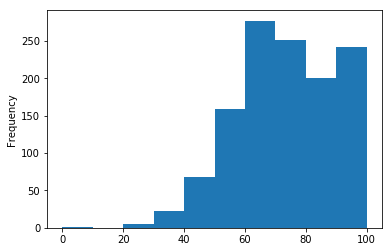

In [70]:
df_merged['Total Grads % of cohort'].plot(kind='hist')

In [71]:
df_merged['Total Grads % of cohort'].describe()

count    1225.000000
mean       73.409143
std        16.270372
min         0.000000
25%        62.000000
50%        72.900000
75%        87.400000
max       100.000000
Name: Total Grads % of cohort, dtype: float64

In [ ]:
##
## Do some visualization
##

In [72]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

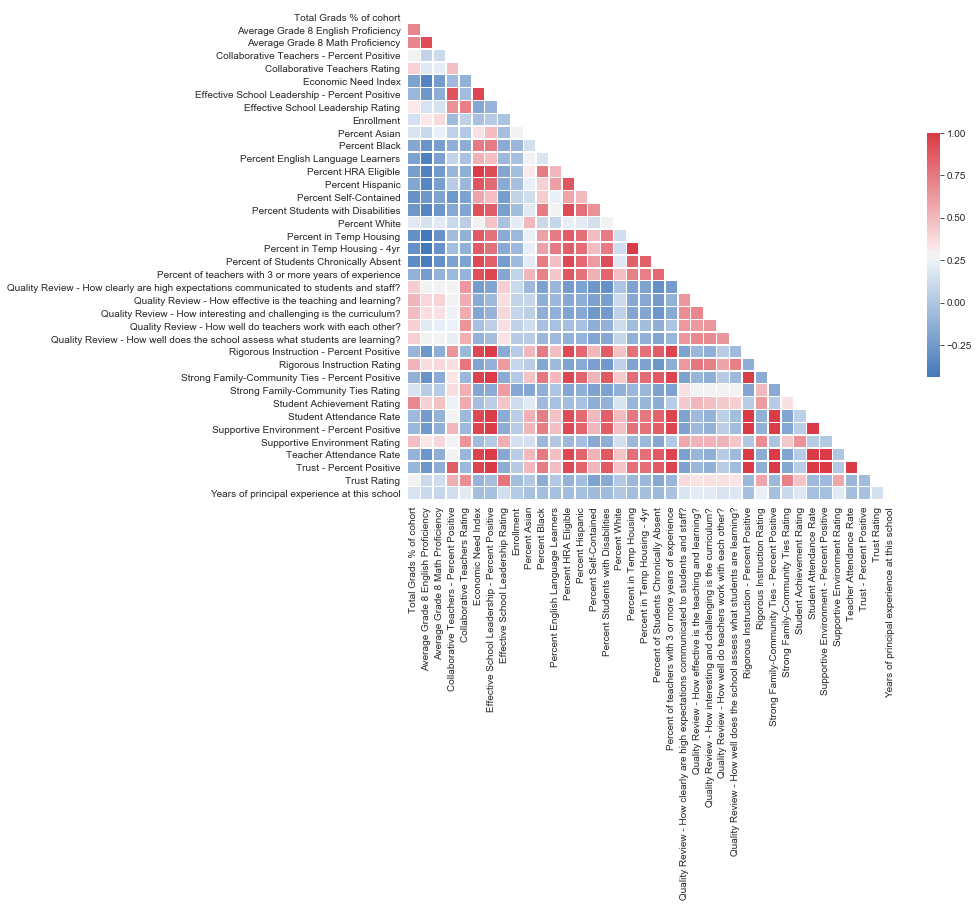

In [74]:
# run a correlation on all of our variables
# print the heat map 
import seaborn as sns
corr = df_merged.corr()
CorrMtx(corr, dropDuplicates = True)

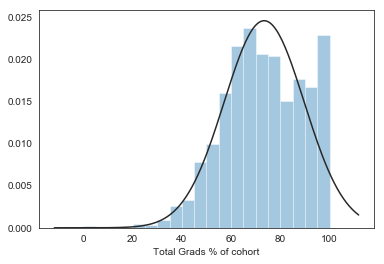

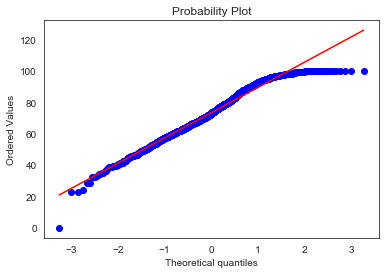

In [100]:
import scipy.stats as stats
sns.distplot(df_merged['Total Grads % of cohort'], fit=stats.norm, bins=20, kde=False);
fig = plt.figure()
res = stats.probplot(df_merged['Total Grads % of cohort'], plot=plt)

In [118]:
df_merged['Total Grads % of cohort'].describe()

count    1225.000000
mean       73.409143
std        16.270372
min         0.000000
25%        62.000000
50%        72.900000
75%        87.400000
max       100.000000
Name: Total Grads % of cohort, dtype: float64

In [95]:
bad_labels = df_merged[df_merged['Total Grads % of cohort'].isna()]['ID'].index

In [101]:
##
## Save our dataframe again!
##
df_merged.to_csv('data/clean_target_and_features.csv')

In [125]:
df_1 = df_merged[df_merged['Total Grads % of cohort'] > 73]

In [126]:
len(df_1)

611

In [123]:
len(df_merged)

1225

In [124]:
df_merged.median()

Total Grads % of cohort                                                                    72.900
Average Grade 8 English Proficiency                                                         2.520
Average Grade 8 Math Proficiency                                                            2.280
Collaborative Teachers - Percent Positive                                                  87.000
Collaborative Teachers Rating                                                               3.000
Economic Need Index                                                                         0.797
Effective School Leadership - Percent Positive                                              0.920
Effective School Leadership Rating                                                          3.000
Enrollment                                                                                438.000
Percent Asian                                                                               0.098
Percent Black       

In [94]:
len(bad_labels)

29

In [106]:
features = list(df_merged.columns.values)

In [115]:
len(features)

37

In [113]:
features.pop(0)

'Total Grads % of cohort'

In [116]:
#break the colums into groups to plot 4 on a row at a time
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]

/Users/markbrennan/anaconda3/envs/learn-env/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


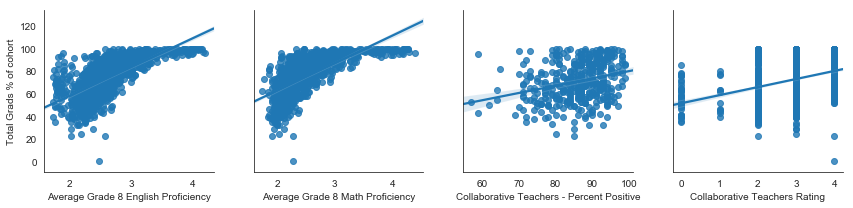

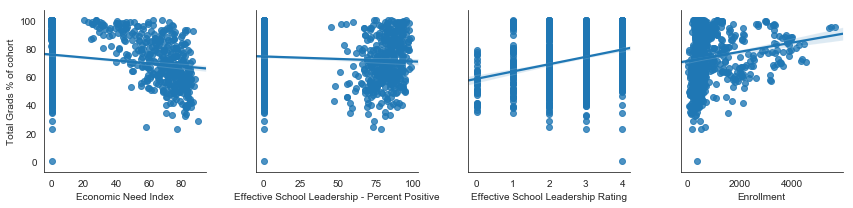

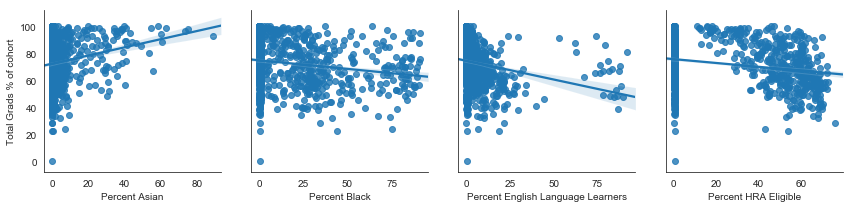

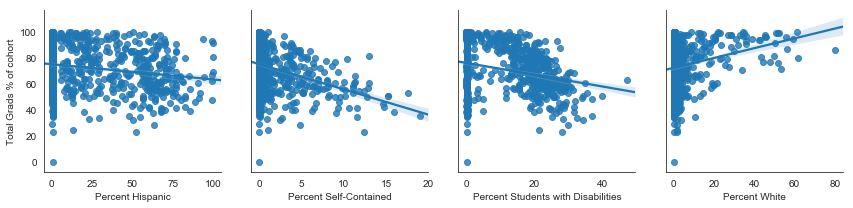

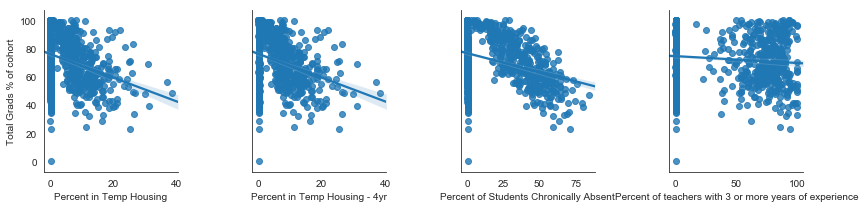

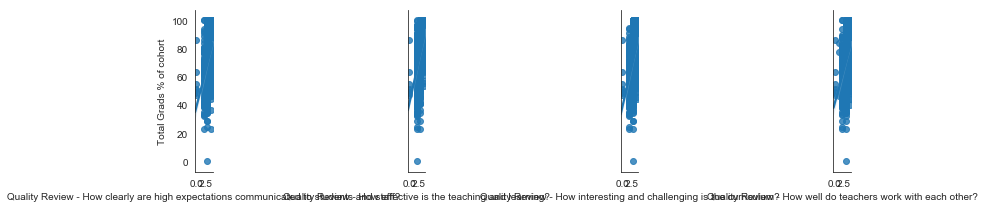

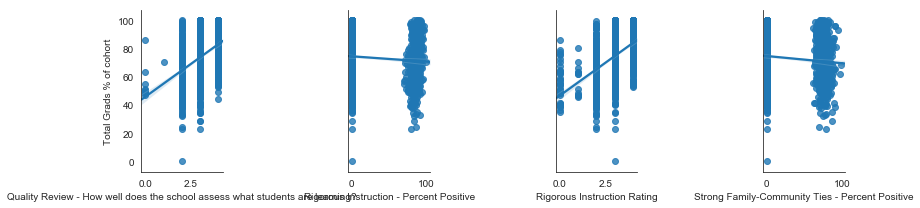

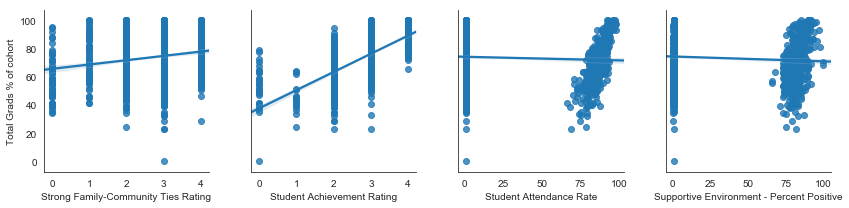

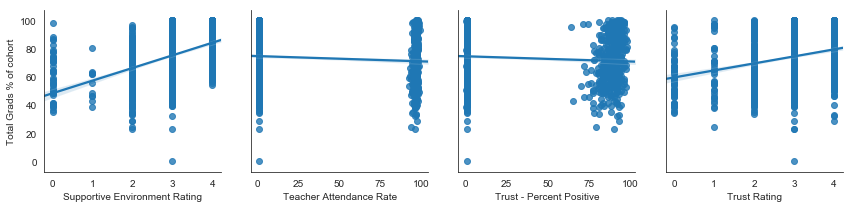

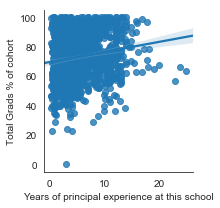

In [117]:
# create scatter plots for every independent variable vs. our target variable
for i in row_groups:
    pp = sns.pairplot(data=df_merged, y_vars=['Total Grads % of cohort'],x_vars=i, kind="reg", height=3)

In [127]:
df_merged['target'] = np.where(df_merged['Total Grads % of cohort'] > 73, 1, 0)

In [133]:
x_class_pass = df_merged[df_merged.target==1]['target']

In [135]:
x_class_fail = df_merged[df_merged.target==0]['target']

In [136]:
len(x_class_fail)

614

In [137]:
len(x_class_pass)

611

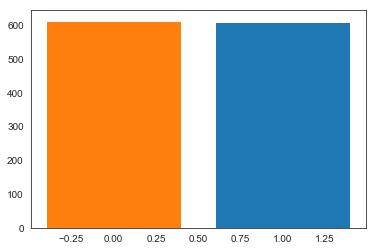

In [139]:
plt.bar(x_class_pass, len(x_class_pass))
plt.bar(x_class_fail, len(x_class_fail))
plt.show()


In [141]:
df_merged.to_csv('data/class_labels_and_targets.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a271e3c18>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

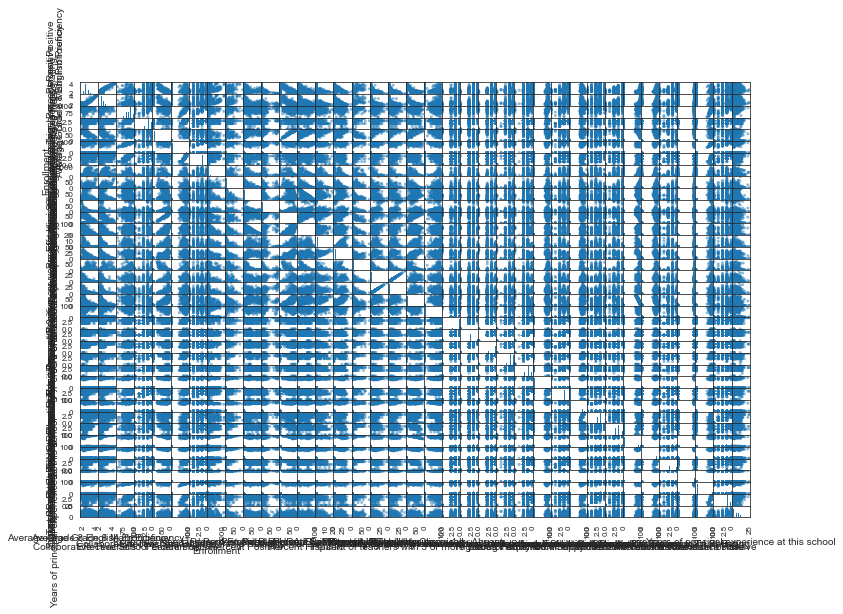

In [146]:
scatter_matrix(df_merged[features], figsize=(12, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a365c8278>,
      dtype=object)

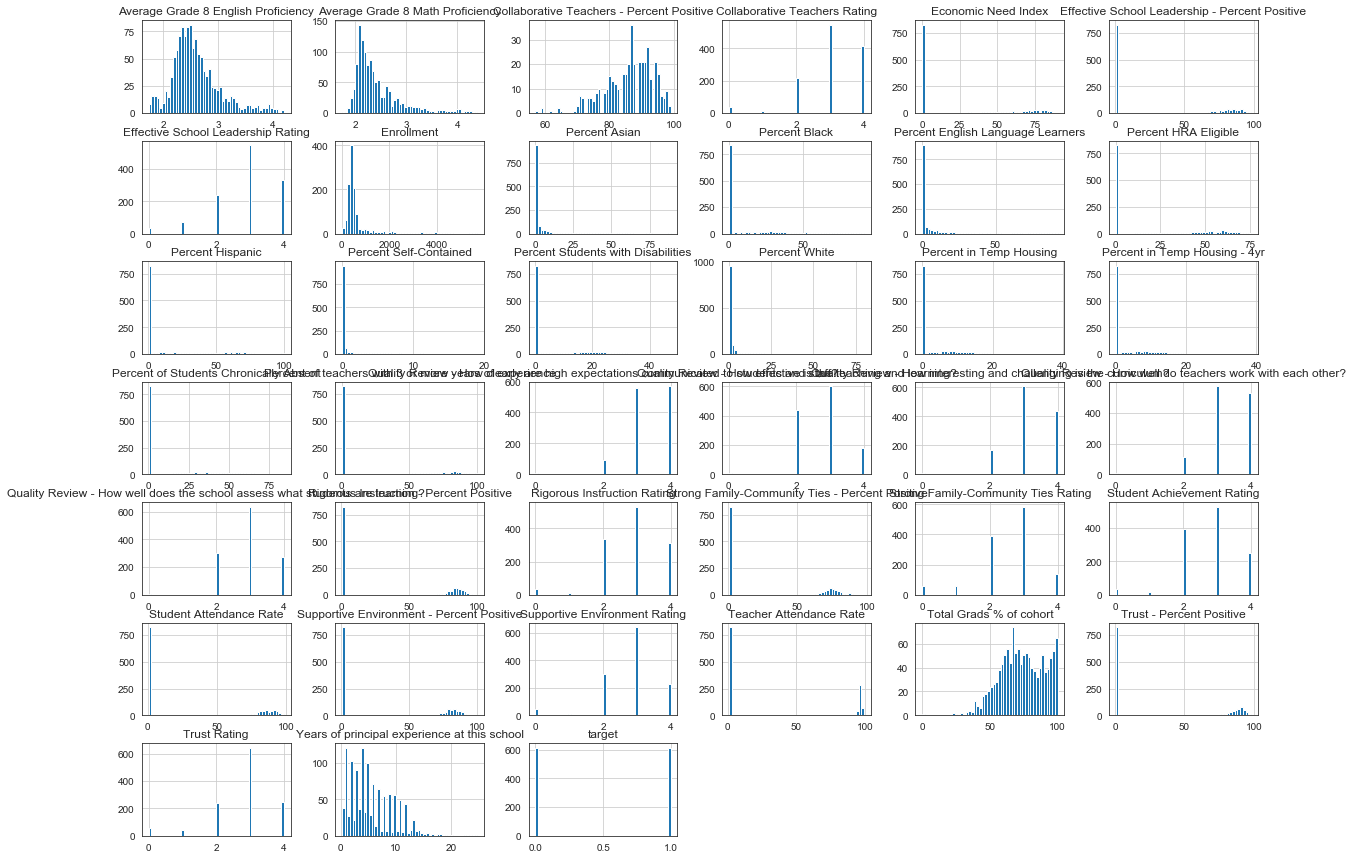

In [148]:
df_merged.hist(bins=50, figsize=(20,15))

In [147]:
len(df_merged.columns)

41

In [142]:
Y_all = df_merged['target']

In [143]:
len(Y_all)

1225

In [150]:
X_all = df_merged.drop(['target','Total Grads % of cohort'], axis=1)

In [151]:
len(X_all.columns)

39

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size = 0.2, random_state = 42)

In [ ]:
X_train